In [10]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10((PIXEL_MAX)**2 / mse)

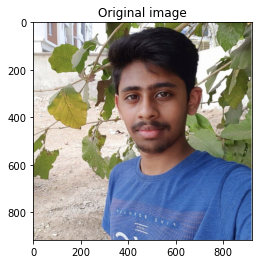

In [3]:
image_path = "Images/DIP1_compressed.jpg"
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original image")
plt.show()

In [ ]:
psnr(img_rgb, img2)

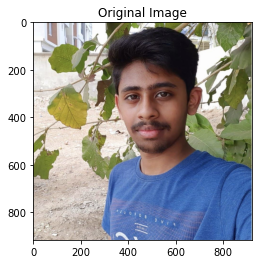

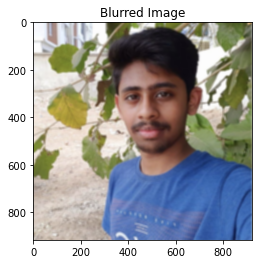

In [4]:
img = cv.imread('Images/DIP1_compressed.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

blurImg = cv.blur(img, (10, 10))
plt.imshow(cv.cvtColor(blurImg, cv.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.show()


In [14]:
psnr(image_rgb,blurImg)

28.886739332228892

In [5]:
cv.imwrite('Images/blur_face.jpeg', blurImg)

True

### Adding Gaussian Noise

In [12]:
mean = 0          # noise is centered around the original pixel intensity.
std = 180       # higher standard deviation results in a wider distribution and more intense noise.
r, c, channels = img.shape
gaussian_noise = np.random.normal(mean, std, (r, c, channels)).astype(np.uint8)
gaussian_noise

array([[[125,  73, 196],
        [ 60,  13, 251],
        [159,  13, 221],
        ...,
        [138, 245, 182],
        [ 62,  11,  84],
        [167, 100, 153]],

       [[  4,  59, 141],
        [ 25,   8,  49],
        [255, 211,  31],
        ...,
        [137,  75, 219],
        [ 98,  63, 234],
        [ 23,  35,  61]],

       [[238,  57, 171],
        [185,  67, 179],
        [192, 240, 167],
        ...,
        [ 68, 197, 233],
        [ 30, 142,  67],
        [117, 234,  54]],

       ...,

       [[108,  16,  62],
        [161, 254,  27],
        [124, 171,  50],
        ...,
        [147, 140, 254],
        [133, 159, 105],
        [ 11, 180,  23]],

       [[219, 135, 244],
        [ 93, 171, 144],
        [198,  69, 224],
        ...,
        [113,  39, 196],
        [111,  42, 188],
        [119, 212, 180]],

       [[ 70,  24, 155],
        [165,  50,  89],
        [208,  85,  56],
        ...,
        [ 37, 123,  29],
        [ 41, 132, 151],
        [ 77, 172, 172]]

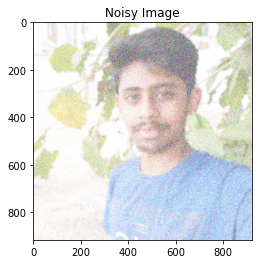

In [13]:
noisy_image = cv.add(blurImg, gaussian_noise)
plt.imshow(cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB))
plt.title("Noisy Image")
plt.show()

In [15]:
psnr(image_rgb,noisy_image)

27.964933030802136

## Decompressing jpeg 2000 

In [16]:
img1 = cv.imread('Images/DIP1_compressed.jpg')
cv.imwrite('Images/DIP1_compressed.jp2', img1, [int(cv.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])
img2 = cv.imread('Images/DIP1_compressed.jp2')
print(psnr(img1, img2))

34.5277657655536


In [18]:
cv.imwrite('dev.jp2', noisy_image, [int(cv.IMWRITE_JPEG2000_COMPRESSION_X1000), 70])

True

In [19]:
img4 = cv.imread('dev.jp2')
print(psnr(image_rgb, img4))

27.927047473756286


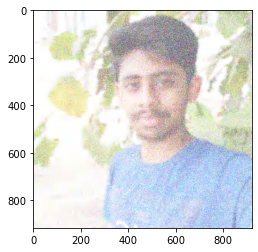

In [20]:
plt.imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
plt.show()
